In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

from keras import Sequential,losses
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD
from keras.utils import np_utils,plot_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/HandwrittenData/A_Z Handwritten Data.csv


In [2]:
df=pd.read_csv("/kaggle/input/HandwrittenData/A_Z Handwritten Data.csv")

In [3]:
print("Count of Images Before deduplicating process",len(df))
df.drop_duplicates(inplace=True)
print("Count of Images After deduplicating process",len(df))

Count of Images Before deduplicating process 372450
Count of Images After deduplicating process 201095


In [4]:
datagen = ImageDataGenerator(width_shift_range=4,height_shift_range=4,validation_split=0.2)

In [5]:
X = df.loc[:,"0.1":]
y = df.loc[:,"0"]

In [6]:
X=X.values.reshape(len(X),28,28,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.85)
X_train = X_train/255
X_test = X_test/255
y_train=np_utils.to_categorical(y_train)

In [7]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(strides=(1,1)))
model.add(Conv2D(8,(3,3),activation="relu"))
model.add(MaxPooling2D(strides=(1,1)))
model.add(Conv2D(8,(3,3),activation="relu"))
model.add(MaxPooling2D(strides=(1,1)))
model.add(Flatten())

# The dense layer is a neural network layer that is connected deeply, 
# which means each neuron in the dense layer receives input from all neurons of its previous layer. 
# The dense layer is found to be the most commonly used layer in the models.

model.add(Dense(128,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(26,activation="softmax"))
model.compile(loss=losses.categorical_crossentropy,metrics=["accuracy"],optimizer=SGD(learning_rate=0.05))
checkpoint = ModelCheckpoint(filepath="model_sgd.pkl",monitor="val_accuracy",verbose=2,save_best_only=True,mode="max")
model.fit(datagen.flow(X_train, y_train, batch_size=128,subset="training"),
          validation_data=datagen.flow(X_train, y_train, batch_size=128,subset="validation"),
          epochs=40,batch_size=128,verbose=2,callbacks=[checkpoint])

Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.90666, saving model to model_sgd.pkl
1069/1069 - 58s - loss: 0.8635 - accuracy: 0.7507 - val_loss: 0.3231 - val_accuracy: 0.9067 - 58s/epoch - 55ms/step
Epoch 2/40

Epoch 2: val_accuracy improved from 0.90666 to 0.95033, saving model to model_sgd.pkl
1069/1069 - 56s - loss: 0.2221 - accuracy: 0.9342 - val_loss: 0.1736 - val_accuracy: 0.9503 - 56s/epoch - 52ms/step
Epoch 3/40

Epoch 3: val_accuracy improved from 0.95033 to 0.95691, saving model to model_sgd.pkl
1069/1069 - 57s - loss: 0.1728 - accuracy: 0.9489 - val_loss: 0.1546 - val_accuracy: 0.9569 - 57s/epoch - 53ms/step
Epoch 4/40

Epoch 4: val_accuracy improved from 0.95691 to 0.95855, saving model to model_sgd.pkl
1069/1069 - 56s - loss: 0.1371 - accuracy: 0.9601 - val_loss: 0.1463 - val_accuracy: 0.9586 - 56s/epoch - 52ms/step
Epoch 5/40

Epoch 5: val_accuracy improved from 0.95855 to 0.96045, saving model to model_sgd.pkl
1069/1069 - 57s - loss: 0.1211 - accuracy: 0.9651

In [8]:
y_predict=model.predict(X_test)
y_predict = np.argmax(y_predict,axis=1)
accuracy_score(y_predict,y_test)

943/943 [==============================] - 2s 2ms/step


0.9862091828277806

In [9]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1143
           1       0.97      0.99      0.98       679
           2       0.98      0.99      0.99      1797
           3       0.95      0.97      0.96       778
           4       0.99      0.98      0.99       949
           5       0.97      0.98      0.98       169
           6       0.99      0.96      0.98       476
           7       0.97      0.97      0.97       615
           8       0.99      0.99      0.99       176
           9       0.97      0.98      0.97       698
          10       0.98      0.97      0.98       515
          11       0.99      0.98      0.98       945
          12       0.99      1.00      0.99      1491
          13       0.98      0.99      0.99      1464
          14       0.99      0.99      0.99      4399
          15       0.99      0.99      0.99      1575
          16       0.98      0.96      0.97       520
          17       0.98    

In [10]:
import shutil
shutil.make_archive("model_sgd.pkl", 'zip', "/kaggle/working/model_sgd.pkl")

'/kaggle/working/model_sgd.pkl.zip'

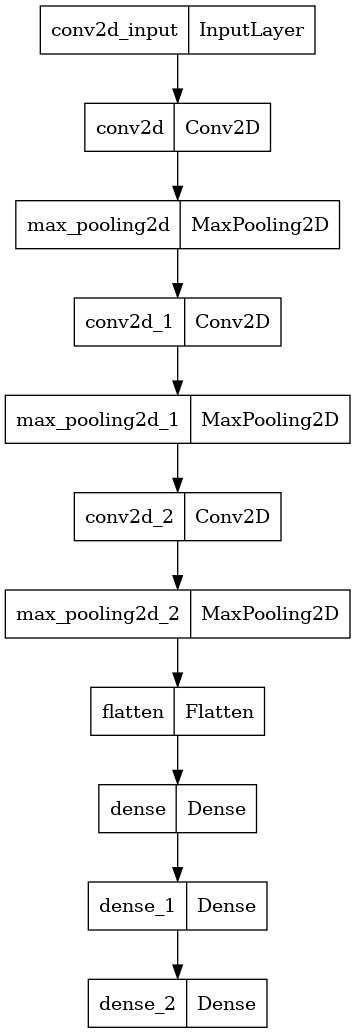

In [11]:
plot_model(model, to_file='cnn_sgd.png')

In [12]:
from keras.models import load_model
model1=load_model("/kaggle/working/model_sgd.pkl")

In [13]:
y_predict=model1.predict(X_test)
y_predict = np.argmax(y_predict,axis=1)
accuracy_score(y_predict,y_test)

943/943 [==============================] - 2s 2ms/step


0.9868722028841372

In [14]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1141
           1       0.99      0.98      0.99       695
           2       0.98      0.99      0.99      1795
           3       0.97      0.92      0.94       837
           4       0.99      0.99      0.99       935
           5       0.97      0.99      0.98       168
           6       0.98      0.99      0.98       457
           7       0.98      0.98      0.98       614
           8       0.98      0.98      0.98       177
           9       0.96      0.98      0.97       688
          10       0.97      0.97      0.97       510
          11       0.99      0.97      0.98       947
          12       1.00      0.99      0.99      1512
          13       0.99      0.99      0.99      1486
          14       0.98      0.99      0.99      4320
          15       0.99      0.99      0.99      1577
          16       0.98      0.98      0.98       502
          17       0.99    

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 16)    160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 16)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 8)     1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 8)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 8)     584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 8)    0